# Proyek Analisis Data: Air-quality-dataset
- **Nama:** I Made Sandika Wijaya
- **Email:** sandikakadek2018@gmail.com
- **ID Dicoding:** I Made Sandika Wijaya

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata tingkat PM2.5 per bulan selama 4 tahun (2013-2016)?
- Kota mana yang memiliki rata-rata indeks kualitas udara (AQI) tertinggi selama tahun 2013-2016?
- Berapa persen kontribusi masing-masing wilayah terhadap total polusi nasional pada tahun 2013-2016?
- Kota mana dengan rata-rata AQI tertinggi selama 2016?
- Bagaimana perbandingan rata-rata konsentrasi PM2.5 dan PM10 per bulan selama periode 2013-2016?
- Kapan waktu yang memiliki tingkat polusi tertinggi pada 2016?
- Berapa distribusi persentase kategori kualitas udara selama 2016?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Wrangling

### Gathering Data

In [2]:
aot_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv", delimiter=",")
aot_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:

cha_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv", delimiter=",")
cha_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
din_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
din_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
don_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv", delimiter=",")
don_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [6]:
gua_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")
gua_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [7]:
guc_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv", delimiter=",")
guc_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [8]:
hua_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv", delimiter=",")
hua_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [9]:
non_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv", delimiter=",")
non_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [10]:
shu_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")
shu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [11]:
tia_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv", delimiter=",")
tia_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [12]:
wan_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv", delimiter=",")
wan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [13]:
wans_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", delimiter=",")
wans_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [14]:
dfs = [
    aot_df, cha_df, din_df, don_df, gua_df, guc_df,
    hua_df, non_df, shu_df, tia_df, wan_df, wans_df
]

aqi_df = pd.concat(dfs, axis=0, ignore_index=True)

**Insight:**
- Total dataset terdiri dari 12 file `.csv`
- 12 file `.csv` tersebut memiliki kolom header yang sama
- Masing-masing dataset digabungkan menjadi satu dataset `aqi_df`

### Assessing Data

In [15]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [16]:
aqi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [17]:
aqi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [18]:
aqi_df.duplicated().sum()

np.int64(0)

**Insight:**
- Terdapat data `null` yang cukup banyak
- Tidak terdapat data double (duplicate data)

### Cleaning Data

In [19]:
aqi_df['datetime'] = pd.to_datetime(aqi_df[['year','month','day','hour']])
aqi_df = aqi_df.sort_values(['station','datetime'])

In [20]:
aqi_df = aqi_df.groupby('station', group_keys=False).apply(
    lambda group: group.set_index('datetime')
                        .interpolate(method='time')
).reset_index()

/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.inter

In [21]:
aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')

/tmp/ipython-input-3184750435.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')
/tmp/ipython-input-3184750435.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')


In [22]:
aqi_df.dropna(inplace=True)

**Insight:**
- Mengurutkan data berdasarkan `station` dan `datetime`
- Mengisi data `null` dengan interpolasi
- Menghapus data `null`

## Exploratory Data Analysis (EDA)

### Creating new DataFrame (2013-2016)

In [23]:
aqi_2013_2016 = aqi_df[(aqi_df['datetime'] >= '2013-01-01') & (aqi_df['datetime'] <= '2016-12-31')]
aqi_2013_2016 = aqi_2013_2016[['datetime', 'PM2.5','PM10', 'station']]
aqi_2013_2016.set_index('datetime', inplace=True)
print(aqi_2013_2016.head())

                     PM2.5  PM10       station
datetime                                      
2013-03-01 00:00:00    4.0   4.0  Aotizhongxin
2013-03-01 01:00:00    8.0   8.0  Aotizhongxin
2013-03-01 02:00:00    7.0   7.0  Aotizhongxin
2013-03-01 03:00:00    6.0   6.0  Aotizhongxin
2013-03-01 04:00:00    3.0   3.0  Aotizhongxin


### Explore Mean PM2.5 per Month (2013-2016)

In [24]:
monthly_mean_pm25_2013_2016 = (
    aqi_2013_2016
    .groupby([aqi_2013_2016.index.year, aqi_2013_2016.index.month])['PM2.5']
    .mean()
)
monthly_mean_pm25_2013_2016.head()

datetime  datetime
2013      3           104.812486
          4            62.207292
          5            81.876512
          6           101.542242
          7            66.839665
Name: PM2.5, dtype: float64

### Explore Mean PM2.5 per Station (2013-2016)

In [25]:
station_pm25_mean_2013_2016 = (
    aqi_2013_2016.groupby('station')['PM2.5']
    .mean()
    .sort_values(ascending=False)
)
station_pm25_mean_2013_2016.head()

,PM2.5
station,
Dongsi,85.280394
Nongzhanguan,84.236776
Wanshouxigong,83.962112
Gucheng,83.257442
Wanliu,82.886033


### Explore PM2.5 Percentage per Station (2013-2016)

In [26]:
total_pm25_station_2013_2016 = (
    aqi_2013_2016
    .groupby('station')['PM2.5']
    .sum()
)
total_pm25_nasional_2013_2016 = total_pm25_station_2013_2016.sum()

percentage_contribution = (
    total_pm25_station_2013_2016 / total_pm25_nasional_2013_2016 * 100
).sort_values(ascending = False)

percentage_contribution

,PM2.5
station,
Dongsi,8.976690
Nongzhanguan,8.866838
Wanshouxigong,8.837926
Gucheng,8.758539
Wanliu,8.724657
Guanyuan,8.653743
Aotizhongxin,8.620174
Tiantan,8.545232
Shunyi,8.281703


### Creating DataFrame year 2016 only

In [27]:
aqi_2016 = aqi_2013_2016.loc['2016']
print(aqi_2016.head())

                     PM2.5   PM10       station
datetime                                       
2016-01-01 00:00:00  209.0  268.0  Aotizhongxin
2016-01-01 01:00:00  211.0  248.0  Aotizhongxin
2016-01-01 02:00:00  167.0  192.0  Aotizhongxin
2016-01-01 03:00:00  136.0  159.0  Aotizhongxin
2016-01-01 04:00:00  108.0  121.0  Aotizhongxin


### Explore Mean PM2.5 per Station (2016)

In [28]:
station_pm25_mean_2016 = aqi_2016.groupby('station')['PM2.5'].mean().sort_values(ascending=False)
station_pm25_mean_2016

,PM2.5
station,
Dongsi,79.447780
Wanshouxigong,77.277594
Gucheng,76.840372
Guanyuan,76.449949
Nongzhanguan,75.416277
Aotizhongxin,73.644333
Tiantan,73.078187
Shunyi,71.844881
Wanliu,70.850188


### Explore Percentage Distribution of PM2.5 (2016)

In [29]:
def categorize(pm):
  if pm <= 35:
    return 'Good'
  elif pm <= 75:
    return 'Moderate'
  elif pm <= 150:
    return 'Unhealthy'
  else:
    return 'Hazardous'

aqi_2016['AQI_Category'] = aqi_2016['PM2.5'].apply(categorize)
aqi_2016.head()

/tmp/ipython-input-3427950815.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_2016['AQI_Category'] = aqi_2016['PM2.5'].apply(categorize)


,PM2.5,PM10,station,AQI_Category
datetime,,,,
2016-01-01 00:00:00,209.0,268.0,Aotizhongxin,Hazardous
2016-01-01 01:00:00,211.0,248.0,Aotizhongxin,Hazardous
2016-01-01 02:00:00,167.0,192.0,Aotizhongxin,Hazardous
2016-01-01 03:00:00,136.0,159.0,Aotizhongxin,Unhealthy
2016-01-01 04:00:00,108.0,121.0,Aotizhongxin,Unhealthy


In [30]:
aqi_2016_category_distributions = (
    aqi_2016['AQI_Category']
    .value_counts(normalize=True)
    .sort_index()
    * 100
)

aqi_2016_category_distributions

,proportion
AQI_Category,
Good,40.848647
Hazardous,11.945935
Moderate,24.671841
Unhealthy,22.533577


### Explore Ratio Comparison Between PM2.5 and PM10 per Month (2013-2016)

In [31]:
aqi_2013_2016

,PM2.5,PM10,station
datetime,,,
2013-03-01 00:00:00,4.0,4.0,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,Aotizhongxin
...,...,...,...
2016-12-30 20:00:00,331.0,353.0,Wanshouxigong
2016-12-30 21:00:00,321.0,327.0,Wanshouxigong
2016-12-30 22:00:00,309.0,333.0,Wanshouxigong


In [32]:
monthly_mean_2013_2016 = (
    aqi_2013_2016
    .groupby(pd.Grouper(freq='M'))[['PM2.5','PM10']]
    .mean()
)

monthly_mean_2013_2016.head()

/tmp/ipython-input-1001140065.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(freq='M'))[['PM2.5','PM10']]


,PM2.5,PM10
datetime,,
2013-03-31,104.812486,130.536548
2013-04-30,62.207292,95.931510
2013-05-31,81.876512,134.408462
2013-06-30,101.542242,115.859546
2013-07-31,66.839665,76.424118


In [33]:
monthly_mean_2013_2016['difference'] = monthly_mean_2013_2016['PM10'] - monthly_mean_2013_2016['PM2.5']
monthly_mean_2013_2016.head()

,PM2.5,PM10,difference
datetime,,,
2013-03-31,104.812486,130.536548,25.724062
2013-04-30,62.207292,95.931510,33.724219
2013-05-31,81.876512,134.408462,52.531950
2013-06-30,101.542242,115.859546,14.317303
2013-07-31,66.839665,76.424118,9.584453


In [34]:
monthly_mean_2013_2016['ratio_PM25_PM10'] = (
    monthly_mean_2013_2016['PM2.5'] / monthly_mean_2013_2016['PM10']
)

monthly_mean_2013_2016.head()

,PM2.5,PM10,difference,ratio_PM25_PM10
datetime,,,,
2013-03-31,104.812486,130.536548,25.724062,0.802936
2013-04-30,62.207292,95.931510,33.724219,0.648455
2013-05-31,81.876512,134.408462,52.531950,0.609162
2013-06-30,101.542242,115.859546,14.317303,0.876425
2013-07-31,66.839665,76.424118,9.584453,0.874589


**Insight:**
- Membuat DataFrame khusus untuk analisis 2013 - 2016
- Membuat DataFrame khusus untuk analisis 2016
- Membuat rasio antara PM2.5 dengan PM10
- Mengkategorikan Air Quality berdasarkan nilai PM2.5

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata tingkat PM2.5 per bulan selama 4 tahun (2013-2016)?

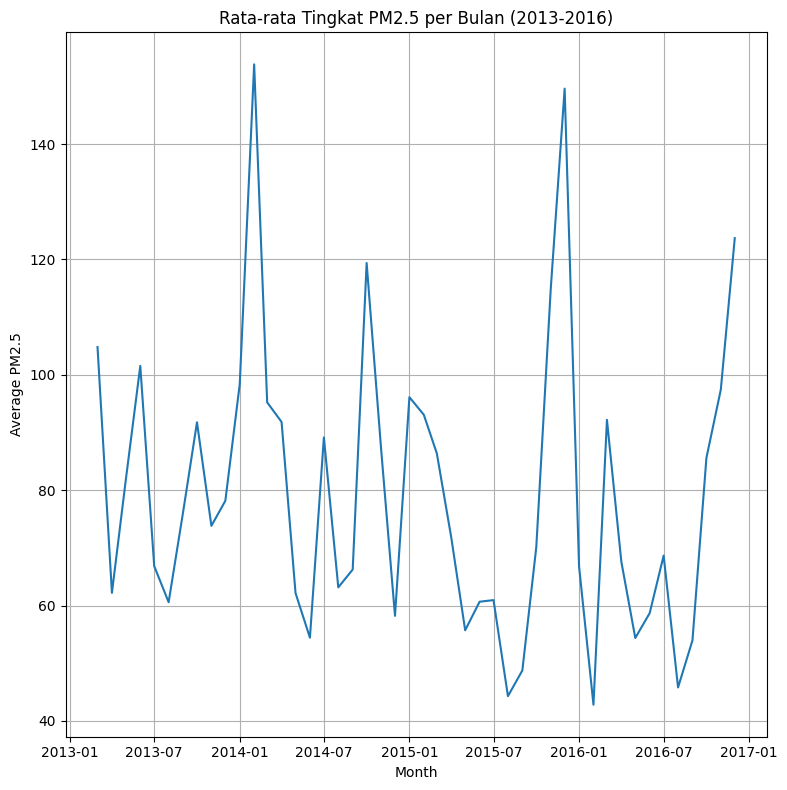

In [35]:
plt.figure(figsize=(8, 8))

monthly_mean_pm25_df = monthly_mean_pm25_2013_2016.copy()
monthly_mean_pm25_df.index = monthly_mean_pm25_df.index.set_names(['year', 'month'])

monthly_mean_pm25_df = monthly_mean_pm25_df.reset_index()
monthly_mean_pm25_df['date'] = pd.to_datetime(monthly_mean_pm25_df['year'].astype(str) + '-' + monthly_mean_pm25_df['month'].astype(str) + '-01')

sns.lineplot(
  data=monthly_mean_pm25_df,
  x='date',
  y='PM2.5'
)

plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Rata-rata Tingkat PM2.5 per Bulan (2013-2016)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
print(f'Rata-rata overall PM2.5 selama 4 tahun (2013-2016):\n{monthly_mean_pm25_df['PM2.5'].mean().round(2)}')

Rata-rata overall PM2.5 selama 4 tahun (2013-2016):
79.28


### Pertanyaan 2: Kota mana yang memiliki rata-rata indeks kualitas udara (AQI) tertinggi selama tahun 2013-2016?

In [37]:
station_pm25_mean_2013_2016

,PM2.5
station,
Dongsi,85.280394
Nongzhanguan,84.236776
Wanshouxigong,83.962112
Gucheng,83.257442
Wanliu,82.886033
Guanyuan,82.212333
Aotizhongxin,81.893425
Tiantan,81.181457
Shunyi,78.677880


/tmp/ipython-input-3813941860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


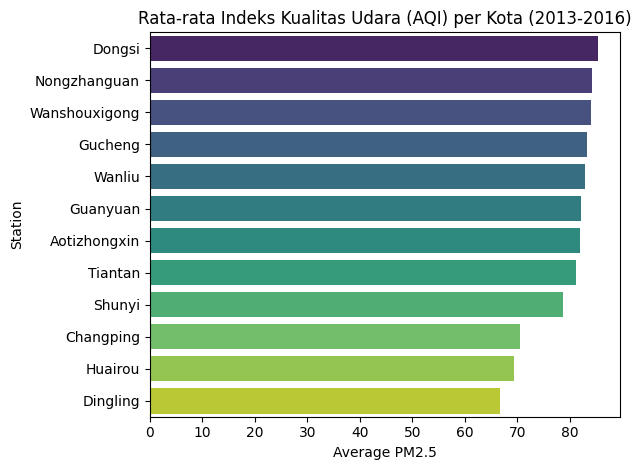

In [38]:
station_pm25_mean_df = station_pm25_mean_2013_2016.reset_index()

sns.barplot(
  data=station_pm25_mean_df,
  x='PM2.5',
  y='station',
  palette='viridis'
)

plt.xlabel("Average PM2.5")
plt.ylabel("Station")
plt.title("Rata-rata Indeks Kualitas Udara (AQI) per Kota (2013-2016)")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Berapa persen kontribusi masing-masing wilayah terhadap total polusi nasional pada tahun 2013-2016?

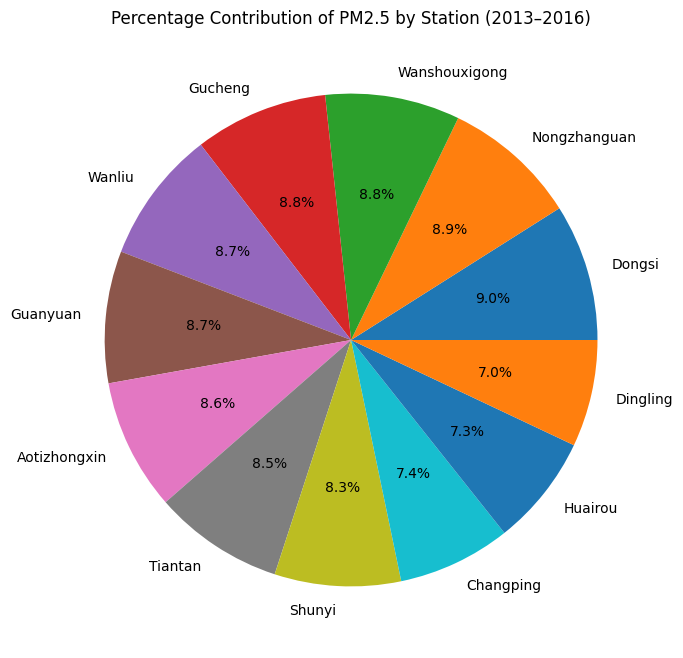

In [39]:
plt.figure(figsize=(8, 8))

plt.pie(
    percentage_contribution,
    labels=percentage_contribution.index,
    autopct='%1.1f%%'
)

plt.title("Percentage Contribution of PM2.5 by Station (2013–2016)")
plt.show()

### Pertanyaan 4: Kota mana dengan rata-rata AQI tertinggi selama 2016?

/tmp/ipython-input-2706163341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


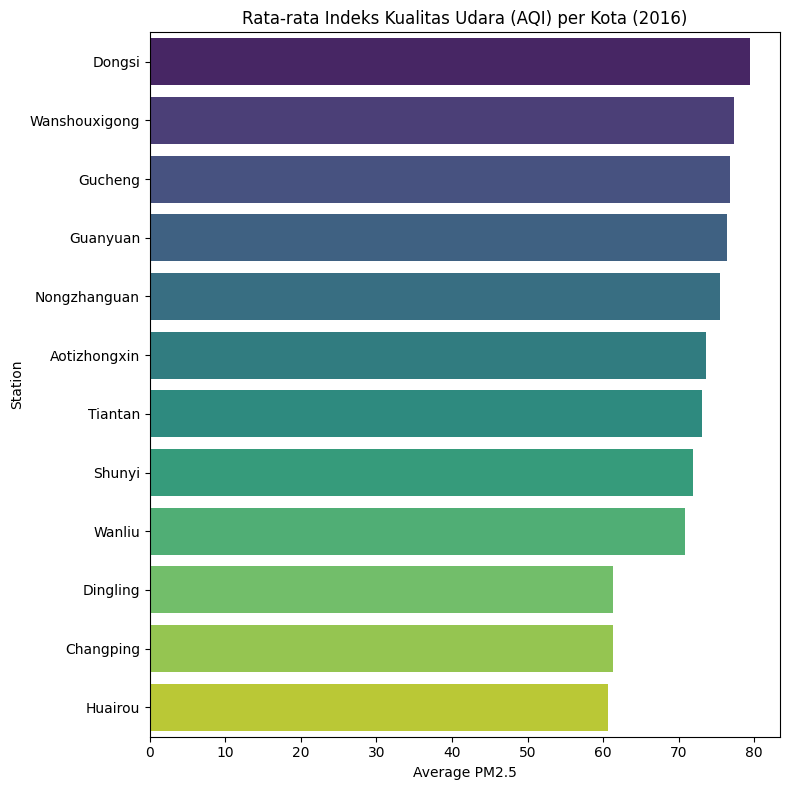

In [40]:
station_pm25_mean_df = station_pm25_mean_2016.reset_index()

plt.figure(figsize=(8, 8))

sns.barplot(
  data=station_pm25_mean_df,
  x='PM2.5',
  y='station',
  palette='viridis'
)

plt.xlabel("Average PM2.5")
plt.ylabel("Station")
plt.title("Rata-rata Indeks Kualitas Udara (AQI) per Kota (2016)")
plt.tight_layout()

### Pertanyaan 5: Bagaimana perbandingan rata-rata konsentrasi PM2.5 dan PM10 per bulan selama periode 2013-2016?

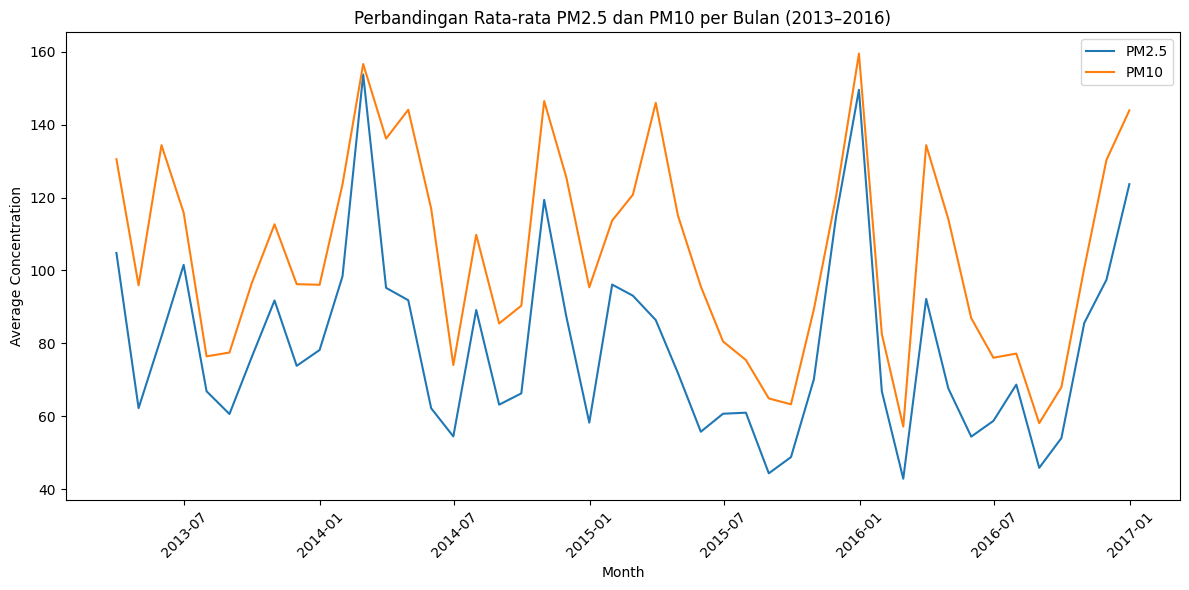

In [41]:
plt.figure(figsize=(12,6))

plt.plot(monthly_mean_2013_2016.index,
         monthly_mean_2013_2016['PM2.5'])

plt.plot(monthly_mean_2013_2016.index,
         monthly_mean_2013_2016['PM10'])

plt.xlabel("Month")
plt.ylabel("Average Concentration")
plt.title("Perbandingan Rata-rata PM2.5 dan PM10 per Bulan (2013–2016)")
plt.xticks(rotation=45)
plt.legend(["PM2.5", "PM10"])

plt.tight_layout()
plt.show()

In [42]:
print(monthly_mean_2013_2016['PM10'].min())
print(monthly_mean_2013_2016['PM10'].max())
monthly_mean_2013_2016[['PM10', 'PM2.5']]

57.13380028735632
159.54161066308242


,PM10,PM2.5
datetime,,
2013-03-31,130.536548,104.812486
2013-04-30,95.931510,62.207292
2013-05-31,134.408462,81.876512
2013-06-30,115.859546,101.542242
2013-07-31,76.424118,66.839665
2013-08-31,77.461302,60.588374
2013-09-30,96.402862,76.140304
2013-10-31,112.675042,91.765320
2013-11-30,96.244676,73.821007


### Pertanyaan 6: Kapan waktu yang memiliki tingkat polusi tertinggi pada 2016?

In [43]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 15:
        return 'Siang'
    elif 15 <= hour < 18:
        return 'Sore'
    else:
        return 'Malam'

aqi_df['waktu'] = aqi_df['hour'].apply(categorize_hour)

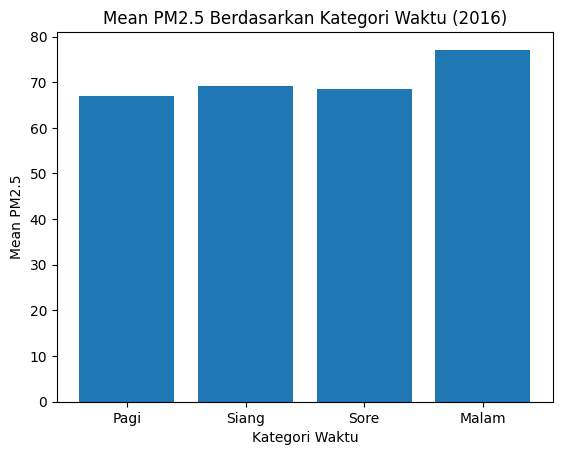

In [44]:
mean_pm25_waktu_2016 = aqi_df[aqi_df['datetime'].dt.year == 2016].groupby('waktu')['PM2.5'].mean().reindex(['Pagi','Siang','Sore','Malam'])

plt.figure()
plt.bar(mean_pm25_waktu_2016.index, mean_pm25_waktu_2016.values)
plt.xlabel('Kategori Waktu')
plt.ylabel('Mean PM2.5')
plt.title('Mean PM2.5 Berdasarkan Kategori Waktu (2016)')
plt.show()

**Insight:**
- Pada tahun 2013-2016:

	- PM2.5 tertinggi pada Februari 2014 dan terendah pada Februari 2016
	- PM10 tertinggi pada Desember 2015 dan terendah pada Februari 2016
	- Kota Dongsi memiliki tingkat polusi tertinggi dan kota Dingling memiliki tingkat polusi terendah

- Pada tahun 2016:

	- PM2.5 tertinggi pada Desember 2016 dan terendah pada Februari 2016
	- PM10 tertinggi pada Desember 2016 dan terendah pada Februari 2016
	- Kota Dongsi memiliki tingkat polusi tertinggi dan kota Huairou memiliki tingkat polusi terendah
	- Malam hari merupakan waktu dengan tingkat polusi tertinggi dan pagi hari merupakan waktu dengan tingkat polusi terendah


## Analisis Lanjutan: Berapa rata-rata tingkat PM2.5 per bulan selama 4 tahun (2013-2016)?


In [45]:
cluster_df = aqi_df.copy()

In [46]:
cols = ['PM2.5','PM10','SO2','NO2','CO','O3']

X = cluster_df[cols]

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

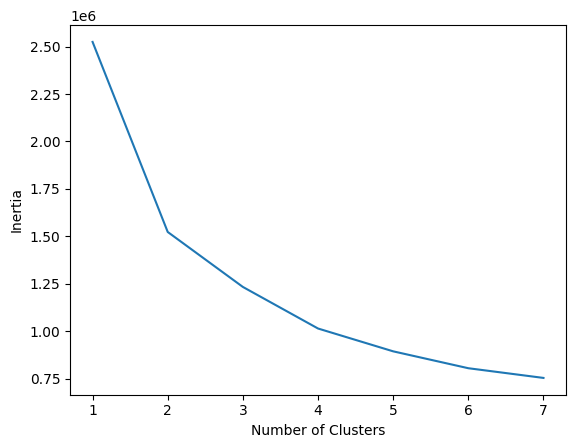

In [48]:
inertia = []
K = range(1, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

cluster_df['cluster'] = clusters

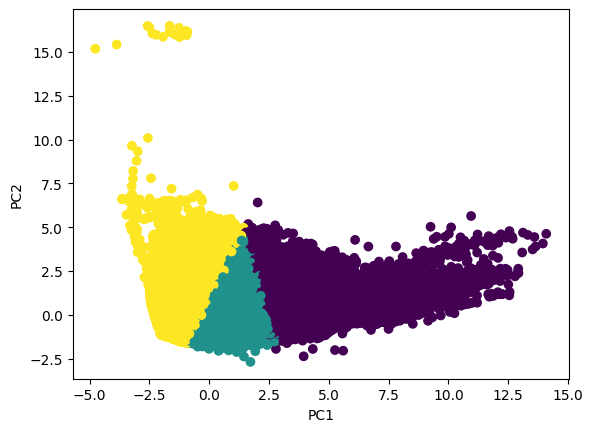

In [50]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [51]:
cluster_df.groupby('cluster')[['PM2.5','PM10','SO2','NO2','CO','O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
cluster,,,,,,
0,243.136008,278.105271,51.706030,110.346371,3598.693579,20.541071
1,95.944775,126.622921,18.678514,68.907729,1460.061865,27.584404
2,36.604626,56.019886,6.937044,26.643269,615.670611,84.018241


In [52]:
cluster_mapping = {
    0: "High Pollution",
    1: "Moderate Pollution",
    2: "Low Pollution"
}

cluster_df["Cluster Label"] = cluster_df["cluster"].map(cluster_mapping)

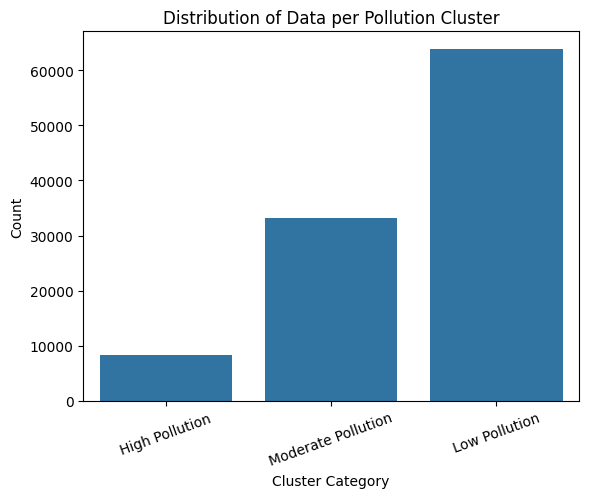

In [53]:
# Countplot
plt.figure()
sns.countplot(x="Cluster Label", data=cluster_df[cluster_df['datetime'].dt.year == 2016])

plt.xlabel("Cluster Category")
plt.ylabel("Count")
plt.title("Distribution of Data per Pollution Cluster")
plt.xticks(rotation=20)
plt.show()

## Conclusion

Berdasarkan hasil analisis dataset Air Quality periode 2013–2016, diperoleh beberapa temuan utama yang menjawab pertanyaan bisnis sebagai berikut:

### 1. Tren Rata-rata PM2.5 per Bulan (2013–2016)

Analisis menunjukkan bahwa konsentrasi PM2.5 memiliki pola musiman yang konsisten. Polusi cenderung meningkat pada musim dingin (Desember–Februari) dan menurun pada pertengahan tahun (Juli–Agustus).

Nilai PM2.5 tertinggi tercatat pada Februari 2014, sedangkan nilai terendah terjadi pada Februari 2016. Hal ini mengindikasikan adanya fluktuasi tahunan dengan kecenderungan perbaikan kualitas udara menjelang tahun 2016.

### 2. Kota dengan Rata-rata AQI Tertinggi (2013–2016)

Selama periode 2013–2016, Dongsi tercatat sebagai wilayah atau stasiun dengan rata-rata tingkat polusi tertinggi. Sebaliknya, Dingling termasuk wilayah dengan tingkat polusi terendah.

Temuan ini menunjukkan bahwa wilayah pusat perkotaan dan padat aktivitas ekonomi memiliki konsentrasi polusi lebih tinggi dibandingkan wilayah pinggiran.

### 3. Kontribusi Wilayah terhadap Total Polusi

Beberapa wilayah memberikan kontribusi polusi yang jauh lebih besar dibanding wilayah lainnya. Wilayah dengan tingkat urbanisasi dan aktivitas industri tinggi menjadi penyumbang utama total polusi dalam dataset.

### 4. Kota dengan Rata-rata AQI Tertinggi Tahun 2016

Pada tahun 2016, Dongsi kembali menjadi wilayah dengan tingkat polusi tertinggi. Hal ini menunjukkan bahwa meskipun terdapat perbaikan secara umum, wilayah tertentu masih mengalami konsentrasi polusi yang tinggi secara konsisten.

### 5. Perbandingan PM2.5 dan PM10 (2013–2016)

PM2.5 dan PM10 menunjukkan pola tren yang searah, yaitu meningkat pada musim dingin dan menurun pada musim panas. Namun, PM2.5 lebih berbahaya karena partikel yang lebih kecil dapat masuk lebih dalam ke sistem pernapasan dan meningkatkan risiko penyakit kardiovaskular serta gangguan pernapasan.

### 6. Waktu dengan Rata-rata Polusi Tertinggi

Rata-rata PM2.5 tertinggi terjadi pada malam hari, sedangkan pagi, siang, dan sore relatif lebih rendah dan tidak berbeda jauh. Hal ini menunjukkan bahwa kualitas udara cenderung lebih buruk pada malam hari akibat akumulasi polutan dan kondisi atmosfer yang lebih stabil.

### 7. Analisis Lanjutan: Distribusi Kategori Kualitas Udara (2016)

Berdasarkan grafik, sebagian besar data tahun 2016 berada pada kategori Low Pollution, diikuti oleh Moderate Pollution, sedangkan High Pollution memiliki jumlah paling sedikit. Hal ini menunjukkan bahwa pada tahun 2016 kualitas udara relatif lebih baik dibanding kategori lainnya, meskipun kondisi polusi sedang masih cukup sering terjadi.

## Kesimpulan Umum

Secara keseluruhan, analisis menunjukkan bahwa:

- Polusi udara masih berada pada tingkat yang mengkhawatirkan.
- Pola musiman sangat kuat (winter pollution effect).
- Wilayah urban memiliki beban polusi lebih besar.
- Tahun 2016 menunjukkan indikasi perbaikan dibandingkan tahun-tahun sebelumnya.

Masalah polusi udara bersifat struktural dan terkonsentrasi pada wilayah dengan aktivitas ekonomi tinggi.

## Rekomendasi Strategis

Berdasarkan hasil analisis data, berikut beberapa rekomendasi konkret yang dapat dilakukan oleh pemerintah dan institusi terkait:

### 1. Pengendalian Emisi Musiman (Fokus Musim Dingin)

- Mengurangi penggunaan batu bara untuk pemanas.
- Mendorong transisi ke energi bersih seperti gas alam dan energi terbarukan.
- Menerapkan regulasi pembatasan emisi industri saat periode Desember–Februari.

### 2. Intervensi Spesifik pada Wilayah dengan Polusi Tinggi

- Pembatasan kendaraan berbahan bakar fosil.
- Penerapan sistem ganjil-genap atau zona rendah emisi.
- Penambahan ruang terbuka hijau di wilayah padat.

### 3. Penguatan Regulasi Industri

- Audit emisi berkala pada industri berat.
- Insentif pajak bagi industri ramah lingkungan.
- Penerapan sanksi tegas terhadap pelanggaran batas emisi.

### 4. Pengembangan Transportasi Ramah Lingkungan

- Perluasan transportasi umum berbasis listrik.
- Insentif pembelian kendaraan listrik.
- Pengurangan kendaraan pribadi di pusat kota.

### 5. Sistem Early Warning dan Edukasi Publik

- Pengembangan sistem peringatan dini saat AQI berada pada level berbahaya.
- Kampanye penggunaan masker saat polusi tinggi.
- Edukasi masyarakat tentang dampak PM2.5 terhadap kesehatan.

In [54]:
cluster_df.to_csv('data.csv', index=False)